# Perceptron

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# Set the Seaborn theme
sns.set_theme()

Here we will show the head of the penguin dataset.

In [22]:
# Import Penguin Dataset as a Dataframe object
pg = pd.read_csv("https://raw.githubusercontent.com/yw110-1/INDE-577/main/Data/penguins.csv")
pg.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


Since the perceptron is used on binary classification, we will focus on two main species of the penguins from the dataset: Adelie and Gentoo. We will set Adelie as 1 and Gentoo as -1 during the training.

In [55]:
# Preprocessing the dataset
pg = pg.dropna()
pg1 = pg[(pg['species'] == 'Adelie') | (pg['species'] == 'Gentoo')]
pg1 = pg1.drop(['island', 'sex'], axis = 1)

In [56]:
pg1.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0


In [68]:
# Store the desired species values in the numpy array y
y = pg1.species.values
# Convert each entry of y with Adelie to 1 and Gentoo to 0
y = np.where(y == 'Adelie', 1, -1)

# Store the desired feature measurements in the matrix X
X = pg1[["bill_length_mm", "bill_depth_mm"]].values

And then we will build the class for single neuron model, which includes a custom python class that stores a scaling value for the cost function, the number of epochs when training, the weights (and bias), and the errors incured during training on a given instance. Moreover, this python class will also contain a training method, a input method, and a predict method.

In [62]:
class Perceptron(object):
    def __init__(self, eta = .5, epochs = 50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

We create an instance of ```Perceptron``` Class and train it on the training set.

In [69]:
# Instantiate one instance of the Perceptron class
percep = Perceptron(epochs = 1000)

# Call the train method to train the weights and bias of the given instance
percep.train(X, y)

After training has finished we can call the ```Perceptron``` class ```predict``` method to view its current predictions given input features.

In [70]:
# Predict labels on the features in X
y_hat = percep.predict(X)

# Compare y_hat and y
print(y == y_hat)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

The predicted value has all true values on the given data. And then we will visualize the perceptron model by ```plot_decision_regions``` function.

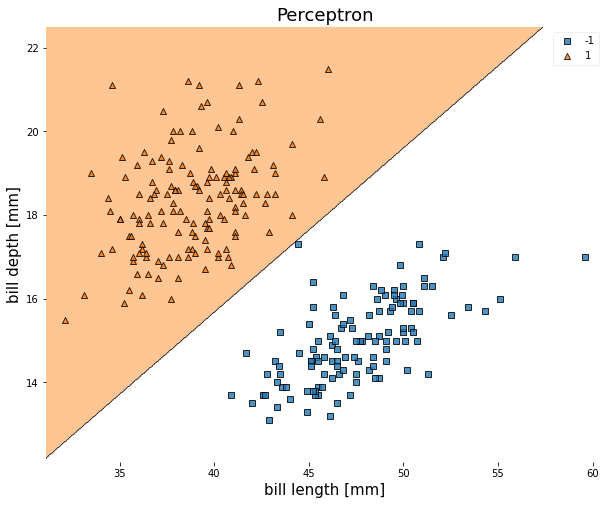

In [73]:
# Plot the Perceptron
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = percep)
plt.title("Perceptron", fontsize = 18)
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.show()

The line from the plot above clearly separate the species that classifies the data. And then we will make error analysis using ```errors_``` attribute so that we can view the errors incurred by model.

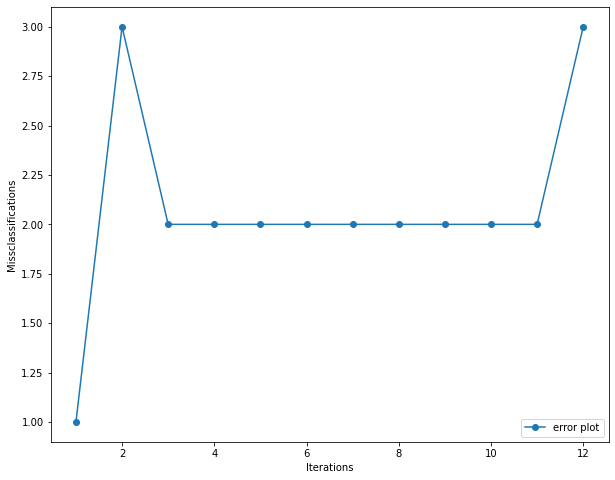

In [75]:
# Error Analysis Plot
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(percep.errors_)+1), percep.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

## Conclusion
The perceptron is performing well when analyzing these two species of penguins. The data generated by these measurements and species was linearly seperable. 